# Siamese Networks

In [1]:
import tensorflow
from matplotlib import pyplot
from keras.datasets import cifar10
from emnist import extract_training_samples
from tensorflow.keras import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## utils

In [2]:

def print_history_chart(history):
    accuracy =history.history['accuracy']
    val_accuracy =history.history['val_accuracy']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']


    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(range(1,len(accuracy)+1),accuracy,color='red',label = "Training Accuracy")
    plt.plot(range(1,len(accuracy)+1),val_accuracy,color='blue',label = "Validation Accuracy")
    plt.ylabel('accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(range(1,len(accuracy)+1),loss,color='red',label = "Training Loss")
    plt.plot(range(1,len(accuracy)+1),val_loss,color='blue',label = "Validation Loss")
    plt.ylabel('Cross Entropy')
    plt.title('Model')
    plt.legend()
    plt.title('Training and Validation Loss')

In [3]:

def show_dataset(x_train):
    img_rows, img_cols = x_train.shape[1], x_train.shape[2]
    col1 = 10
    row1 = 1

    # Show a few sample digits from the training set
    plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
    col2 = 20
    row2 = 5
    fig = plt.figure(figsize=(col2, row2))
    for index in range(col1*row1, col1*row1 + col2*row2):
        fig.add_subplot(row2, col2, index - col1*row1 + 1)
        plt.axis('off')
        plt.imshow(x_train[index]) # index of the sample picture
    plt.show()
    


In [4]:
EPOCHS = 10 # parameter for model.fit. It is here just for my convenience 

# Vanilla Network

In [5]:
!pip install emnist


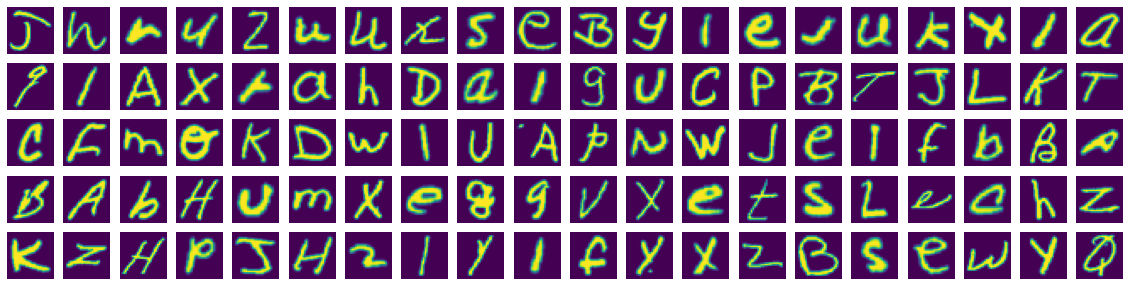

(124800, 28, 28, 1)
26
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               5308928   
_________________________________________________________________
dense_1 (Dense)              (Non

In [6]:


images, labels = extract_training_samples('letters')
images.astype('float32') 
show_dataset(images)

images = images/255.
img_rows, img_cols = images.shape[1:3]
images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
print(images.shape)

num_classes = np.size(np.unique(labels)) 
print(num_classes)
labels = utils.to_categorical(labels-1, num_classes) 


x_train, x_rem, y_train, y_rem = train_test_split(images,labels, train_size=0.8)
test_size = 0.5
x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.8)



model1 = models.Sequential()
model1.add(Input(shape=(images.shape[1],images.shape[2],1)  ))
model1.add(layers.Conv2D(32, (3, 3), activation='relu',))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))


print(model1.summary())


model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=128, epochs=EPOCHS)

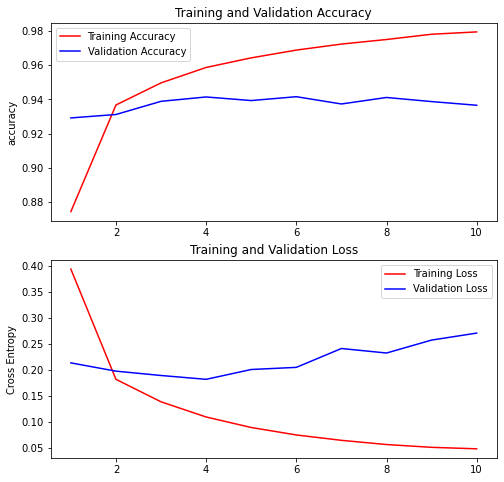

In [7]:
print_history_chart(history1)

# VGG19 transfer learning

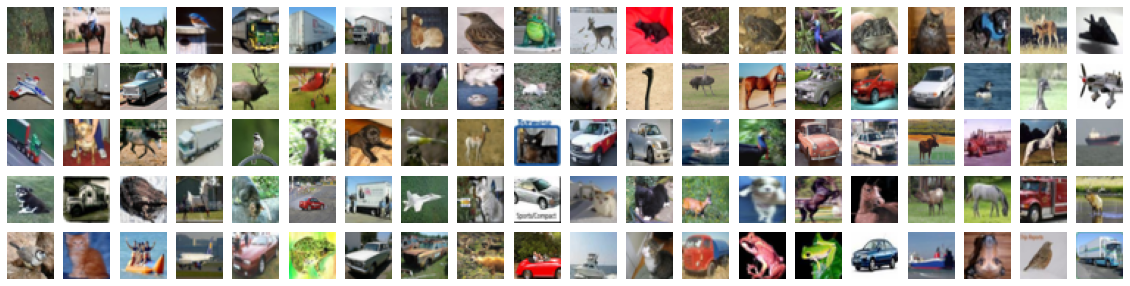

In [8]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_dataset(x_train)


num_classes = 10 
x_train = x_train/255.
y_train = utils.to_categorical(y_train, num_classes) 

x_test = x_test/255.
y_test = utils.to_categorical(y_test, num_classes) 


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
# rozpoznawanie cyferek VGG19 transfer learning
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))
conv_base.trainable = False

print(conv_base.summary())



Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=128, epochs=EPOCHS,validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 287s 733ms/step - loss: 1.6039 - accuracy: 0.4313 - val_loss: 1.3615 - val_accuracy: 0.5195
Epoch 2/10
391/391 [==============================] - 286s 731ms/step - loss: 1.3809 - accuracy: 0.5136 - val_loss: 1.3058 - val_accuracy: 0.5395
Epoch 3/10
391/391 [==============================] - 283s 724ms/step - loss: 1.3173 - accuracy: 0.5390 - val_loss: 1.2441 - val_accuracy: 0.5628
Epoch 4/10
391/391 [==============================] - 294s 751ms/step - loss: 1.2822 - accuracy: 0.5508 - val_loss: 1.2224 - val_accuracy: 0.5717
Epoch 5/10
391/391 [==============================] - 366s 937ms/step - loss: 1.2482 - accuracy: 0.5620 - val_loss: 1.2016 - val_accuracy: 0.5786
Epoch 6/10
391/391 [==============================] - 335s 856ms/step - loss: 1.2269 - accuracy: 0.5718 - val_loss: 1.1861 - val_accuracy: 0.5821
Epoch 7/10
391/391 [==============================] - 339s 866ms/step - loss: 1.2088 - accuracy: 0.5780 - val_loss: 1.1707 -

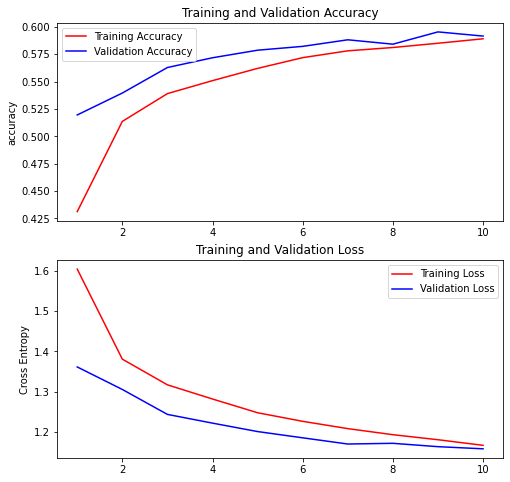

In [13]:
# model3.evaluate(x_test, y_test, verbose=0)

print_history_chart(history3)

# Siamese network

In [14]:
def create_base_model(input_shape):
    model_input = Input(shape=input_shape)

    embedding = Conv2D(32, kernel_size=(3, 3), input_shape=input_shape)(model_input)
    embedding = BatchNormalization()(embedding)
    embedding = Activation(activation='relu')(embedding)
    embedding = MaxPooling2D(pool_size=(2, 2))(embedding)
    embedding = Conv2D(64, kernel_size=(3, 3))(embedding)
    embedding = BatchNormalization()(embedding)
    embedding = Activation(activation='relu')(embedding)
    embedding = MaxPooling2D(pool_size=(2, 2))(embedding)
    embedding = Flatten()(embedding)
    embedding = Dense(128)(embedding)
    embedding = BatchNormalization()(embedding)
    embedding = Activation(activation='relu')(embedding)

    return Model(model_input, embedding)


def create_head_model(embedding_shape):
    embedding_a = Input(shape=embedding_shape)
    embedding_b = Input(shape=embedding_shape)

    head = Concatenate()([embedding_a, embedding_b])
    head = Dense(8)(head)
    head = BatchNormalization()(head)
    head = Activation(activation='sigmoid')(head)

    head = Dense(1)(head)
    head = BatchNormalization()(head)
    head = Activation(activation='sigmoid')(head)

    return Model([embedding_a, embedding_b], head)


In [15]:
"""
This is a modified version of the Keras mnist example.
https://keras.io/examples/mnist_cnn/
Instead of using a fixed number of epochs this version continues to train until a stop criteria is reached.
A siamese neural network is used to pre-train an embedding for the network. The resulting embedding is then extended
with a softmax output layer for categorical predictions.
Model performance should be around 99.84% after training. The resulting model is identical in structure to the one in
the example yet shows considerable improvement in relative error confirming that the embedding learned by the siamese
network is useful.
"""

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Concatenate
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.layers import Input, Flatten, Dense

from siamese import SiameseNetwork

batch_size = 128
num_classes = 10
epochs = 999999

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


def create_base_model(input_shape):
    model_input = Input(shape=input_shape)

    embedding = Conv2D(32, kernel_size=(3, 3), input_shape=input_shape)(model_input)
    embedding = BatchNormalization()(embedding)
    embedding = Activation(activation='relu')(embedding)
    embedding = MaxPooling2D(pool_size=(2, 2))(embedding)
    embedding = Conv2D(64, kernel_size=(3, 3))(embedding)
    embedding = BatchNormalization()(embedding)
    embedding = Activation(activation='relu')(embedding)
    embedding = MaxPooling2D(pool_size=(2, 2))(embedding)
    embedding = Flatten()(embedding)
    embedding = Dense(128)(embedding)
    embedding = BatchNormalization()(embedding)
    embedding = Activation(activation='relu')(embedding)

    return Model(model_input, embedding)


def create_head_model(embedding_shape):
    embedding_a = Input(shape=embedding_shape)
    embedding_b = Input(shape=embedding_shape)

    head = Concatenate()([embedding_a, embedding_b])
    head = Dense(8)(head)
    head = BatchNormalization()(head)
    head = Activation(activation='sigmoid')(head)

    head = Dense(1)(head)
    head = BatchNormalization()(head)
    head = Activation(activation='sigmoid')(head)

    return Model([embedding_a, embedding_b], head)


num_classes = 10
epochs = 999999

base_model = create_base_model(input_shape)
head_model = create_head_model(base_model.output_shape)

siamese_network = SiameseNetwork(base_model, head_model)
siamese_network.compile(loss='binary_crossentropy', optimizer=keras.optimizers.adam(), metrics=['accuracy'])

siamese_checkpoint_path = "./siamese_checkpoint"

siamese_callbacks = [
    EarlyStopping(monitor='val_acc', patience=10, verbose=0),
    ModelCheckpoint(siamese_checkpoint_path, monitor='val_acc', save_best_only=True, verbose=0)
]

siamese_network.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=1000,
                    epochs=epochs,
                    callbacks=siamese_callbacks)

siamese_network.load_weights(siamese_checkpoint_path)
embedding = base_model.outputs[-1]

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Add softmax layer to the pre-trained embedding network
embedding = Dense(num_classes)(embedding)
embedding = BatchNormalization()(embedding)
embedding = Activation(activation='sigmoid')(embedding)

model = Model(base_model.inputs[0], embedding)
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

model_checkpoint_path = "./model_checkpoint"

model__callbacks = [
    EarlyStopping(monitor='val_acc', patience=10, verbose=0),
    ModelCheckpoint(model_checkpoint_path, monitor='val_acc', save_best_only=True, verbose=0)
]

model.fit(x_train, y_train,
          batch_size=128,
          epochs=epochs,
          callbacks=model__callbacks,
          validation_data=(x_test, y_test))

model.load_weights(model_checkpoint_path)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


ValueError: Input 0 of layer batch_normalization_3 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 8]

In [ ]:
!pip install git+https://github.com/aspamers/siamese
